#Machine Learning Regressão

## Machine Learning Regressão - Conceitos Básicos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importação das bibliotecas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Definindo Data Frame

In [6]:
dados = pd.DataFrame({'fim_de_semana':[1,1,0,0,0,0,0,1,1],
                      'ensolarado':[1,1,1,1,0,0,1,0,0],
                      'temperatura':[32,35,27,21,22,30,33,35,27],
                      'numero_de_sorvetes':[98,120,18,10,12,15,60,101,115]})

In [7]:
dados.head()

,fim_de_semana,ensolarado,temperatura,numero_de_sorvetes
0,1,1,32,98
1,1,1,35,120
2,0,1,27,18
3,0,1,21,10
4,0,0,22,12


Grafico de Dispersão

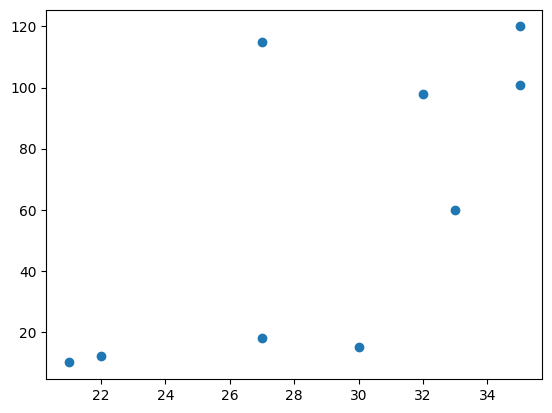

In [8]:
plt.scatter(dados['temperatura'], dados['numero_de_sorvetes'])

Traçando linha de Regressão

In [9]:
linha = np.polyfit(dados['temperatura'], dados['numero_de_sorvetes'], 1)
linha1 = np.poly1d(linha)

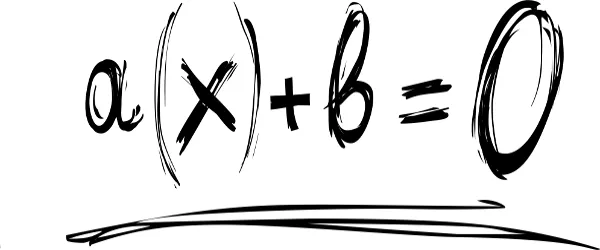

In [10]:
linha

array([   6.32284264, -123.06497462])

In [11]:
34 * linha[0] + linha[1]

np.float64(91.91167512690365)

In [12]:
linha1(34)

np.float64(91.91167512690365)

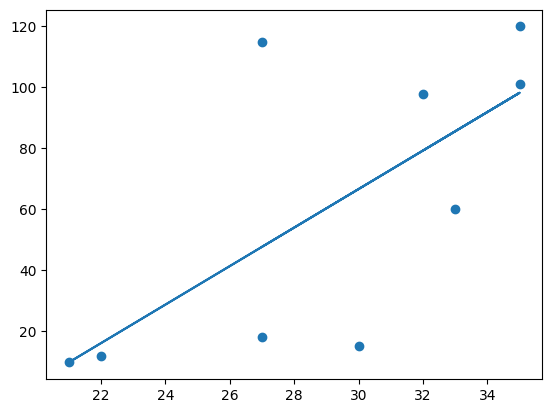

In [13]:
plt.scatter(dados['temperatura'], dados['numero_de_sorvetes'])
plt.plot(dados['temperatura'], linha1(dados['temperatura']))
plt.show()

Teste com um Único X

In [14]:
x1 = dados[['temperatura']]
y1 = dados['numero_de_sorvetes']

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
modelo1 = LinearRegression()
modelo1.fit(x1, y1)

LinearRegression()

In [17]:
modelo1.predict([[34]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.91167513])

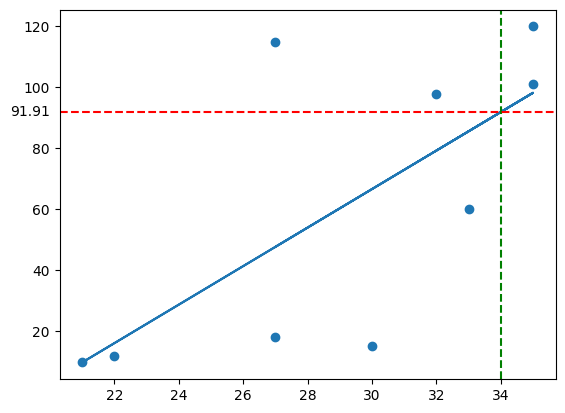

In [18]:
plt.scatter(dados['temperatura'], dados['numero_de_sorvetes'])
plt.plot(dados['temperatura'], linha1(dados['temperatura']))
plt.axvline(x = 34, color='g', linestyle='--')
plt.axhline(y =linha1(34), color='r', linestyle='--')
plt.text(20,91.91, round(linha1(34), 2), va='center', ha='right')
plt.show()

Separando X e Y

In [19]:
x = dados[['fim_de_semana', 'ensolarado', 'temperatura']]
y = dados['numero_de_sorvetes']

Treinamento

In [20]:
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

Previsão

In [21]:
teste = [1,0,22] # 1 = É final de semana, não está ensolarado e temperatura de 22 graus

In [22]:
modelo.predict([teste])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([85.57392559])

## Exemplo - Minério de Ferro X Ações da Vale

Importação de dados

In [23]:
import pandas as pd
url2 = '/content/drive/MyDrive/Programação em Python para Data Science/dados_minerio_de_ferro.csv'
dados2 = pd.read_csv(url2, sep=';')
dados2

,Data,Último_xangai,Abertura_xangai,Máxima_xangai,Mínima_xangai,Vol_xangai,Var%_xangai,Último_cingapura,Var%_cingapura,Último_vale,Abertura_vale,Máxima_vale,Mínima_vale,Vol_vale,Var%_vale
0,20/01/2023,856.5,854.5,865.5,848.0,408950.0,0.0076,123.08,0.0068,93.99,93.90,94.57,93.50,27050000.0,0.0027
1,19/01/2023,850.0,845.5,859.5,842.0,616980.0,0.0125,122.25,0.0073,93.74,93.80,94.37,93.32,21710000.0,0.0043
2,18/01/2023,839.5,835.5,848.5,831.5,622280.0,0.0066,121.37,0.0029,93.34,93.06,94.24,92.91,16740000.0,0.0131
3,17/01/2023,834.0,836.0,841.5,826.5,542980.0,-0.0142,121.02,0.0042,92.13,92.51,93.24,91.83,18720000.0,-0.0013
4,16/01/2023,846.0,859.0,863.5,830.0,1000000.0,-0.0276,120.51,-0.0249,92.25,92.00,92.39,90.83,19560000.0,-0.0167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


limpeza da base

In [24]:
dados_nulos = dados2.isnull() # Cria um novo dataframe com Verdadeiros e Falsos sendo Verdadeiro = Vazio
linhas_remover = dados_nulos.query('Data == True').index # Verifica se a coluna DATA tem Vazio
dados2.drop(linhas_remover, axis=0, inplace=True)
dados2

,Data,Último_xangai,Abertura_xangai,Máxima_xangai,Mínima_xangai,Vol_xangai,Var%_xangai,Último_cingapura,Var%_cingapura,Último_vale,Abertura_vale,Máxima_vale,Mínima_vale,Vol_vale,Var%_vale
0,20/01/2023,856.5,854.5,865.5,848.0,408950.0,0.0076,123.08,0.0068,93.99,93.90,94.57,93.50,27050000.0,0.0027
1,19/01/2023,850.0,845.5,859.5,842.0,616980.0,0.0125,122.25,0.0073,93.74,93.80,94.37,93.32,21710000.0,0.0043
2,18/01/2023,839.5,835.5,848.5,831.5,622280.0,0.0066,121.37,0.0029,93.34,93.06,94.24,92.91,16740000.0,0.0131
3,17/01/2023,834.0,836.0,841.5,826.5,542980.0,-0.0142,121.02,0.0042,92.13,92.51,93.24,91.83,18720000.0,-0.0013
4,16/01/2023,846.0,859.0,863.5,830.0,1000000.0,-0.0276,120.51,-0.0249,92.25,92.00,92.39,90.83,19560000.0,-0.0167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,11/02/2019,651.5,652.0,652.0,651.0,282460.0,0.0786,89.97,-0.0317,30.58,31.92,32.06,30.49,30700000.0,-0.0264
912,1/02/2019,604.0,587.5,623.0,586.0,1900000.0,0.0334,86.90,0.1430,33.66,33.27,33.72,33.17,21290000.0,0.0166
913,31/01/2019,584.5,592.0,594.0,576.0,1800000.0,0.0112,76.03,0.0044,33.11,34.20,34.52,33.11,39810000.0,-0.0236
914,30/01/2019,578.0,562.5,589.0,562.0,1900000.0,0.0396,75.70,0.0013,33.91,33.66,34.06,32.73,67890000.0,0.0904


Separar culunas que serão usadas no treinamento

In [25]:
colunas_validas = dados2.drop(['Data','Vol_xangai','Var%_xangai','Último_cingapura', 'Var%_cingapura','Último_vale', 'Vol_vale', 'Var%_vale'], axis=1)
colunas_validas

,Último_xangai,Abertura_xangai,Máxima_xangai,Mínima_xangai,Abertura_vale,Máxima_vale,Mínima_vale
0,856.5,854.5,865.5,848.0,93.90,94.57,93.50
1,850.0,845.5,859.5,842.0,93.80,94.37,93.32
2,839.5,835.5,848.5,831.5,93.06,94.24,92.91
3,834.0,836.0,841.5,826.5,92.51,93.24,91.83
4,846.0,859.0,863.5,830.0,92.00,92.39,90.83
...,...,...,...,...,...,...,...
911,651.5,652.0,652.0,651.0,31.92,32.06,30.49
912,604.0,587.5,623.0,586.0,33.27,33.72,33.17
913,584.5,592.0,594.0,576.0,34.20,34.52,33.11
914,578.0,562.5,589.0,562.0,33.66,34.06,32.73


Treinamento

In [26]:
# Tentaremos prever a máxima da Vale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error # fala se erra muito ou erra pouco

In [27]:
# Separa X e Y
x = colunas_validas.drop(['Máxima_vale'], axis=1)

y = colunas_validas.Máxima_vale

In [28]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.1)

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_treino, y_treino)

LinearRegression()

Previsão

In [31]:
previsao_lr = lr.predict(x_teste)
previsao_lr

array([76.71531683, 87.82861327, 91.49465015, 77.70683555, 92.35712244,
       41.67473842, 41.8953095 , 60.99602475, 36.18951221, 69.58542028,
       70.06269475, 46.44813787, 80.19391773, 67.55432512, 36.47325447,
       47.29817978, 35.57533925, 90.30735811, 37.50913633, 77.95339355,
       38.17065932, 94.73516691, 79.55867091, 80.25814341, 33.27087596,
       34.3866336 , 67.58817724, 34.79614054, 79.94562748, 73.05141036,
       34.67417951, 69.27923533, 74.13268195, 85.3997999 , 72.39571485,
       38.236428  , 38.92890989, 81.47945289, 46.34171704, 72.24039713,
       80.09768365, 37.65401948, 85.67088563, 71.40970907, 63.36136504,
       82.45625643, 45.84041253, 94.01167531, 40.17303762, 35.82891902,
       88.00690463, 66.47232318, 74.1562644 , 40.85664277, 37.56878884,
       42.08974629, 89.7385325 , 69.16303549, 38.99597664, 33.81885204,
       35.41882211, 35.37936264, 69.76602953, 42.0131221 , 42.76822909,
       76.5682932 , 86.6490991 , 74.61208936, 61.90739749, 36.28

Metricas

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html

In [32]:
median_absolute_error(y_teste, previsao_lr)

np.float64(0.29213514230921334)

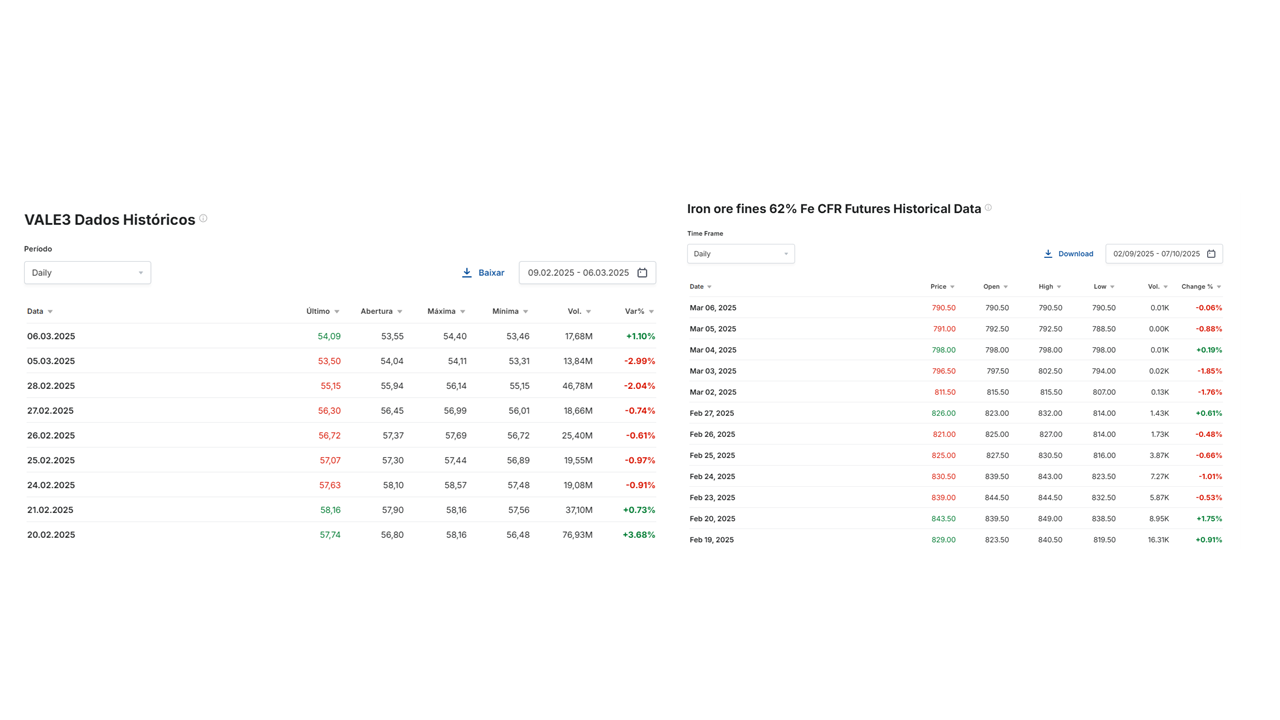

https://br.investing.com/equities/vale-on-n1-historical-data

https://www.investing.com/commodities/iron-ore-62-cfr-futures-historical-data?cid=961741

In [33]:
dados_p_prever = pd.DataFrame({'Último_xangai':[790.50], 'Abertura_xangai':[790.50],
                               'Máxima_xangai':[790.50],'Mínima_xangai':[790.50],
                               'Abertura_vale':[53.55],'Mínima_vale':[53.46]})

In [34]:
dados_p_prever

,Último_xangai,Abertura_xangai,Máxima_xangai,Mínima_xangai,Abertura_vale,Mínima_vale
0,790.5,790.5,790.5,790.5,53.55,53.46


In [35]:
previsao_para_hoje = lr.predict(dados_p_prever)

In [36]:
previsao_para_hoje

array([54.41096099])

## Machine Learning - Exercício

Elaborar um treinamento de máquina para as ações da petrobras e a cotação do valor do Petróleo em Londres, de acordo com a base de dados fornecida.


https://br.investing.com/commodities/brent-oil

In [64]:
import pandas as pd
import datetime as datetime

url_brent = '/content/drive/MyDrive/Programação em Python para Data Science/Petróleo Brent Futuros Dados Históricos.csv'

url_petr = '/content/drive/MyDrive/Programação em Python para Data Science/PETR3 Dados Históricos.csv'

df_brent = pd.read_csv(url_brent, sep=';')

df_petr = pd.read_csv(url_petr, sep=';')

df_brent.head() # df_petr.head()

,Data,Último,Abertura,Máxima,Mínima,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,02.01.2018,66.57,66.55,67.29,66.24,NaN,NaN,NaN,NaN
1,03.01.2018,67.84,66.54,68.03,66.40,NaN,NaN,NaN,NaN
2,04.01.2018,68.07,67.89,68.27,67.62,NaN,NaN,NaN,NaN
3,05.01.2018,67.62,67.97,68.11,67.26,NaN,NaN,NaN,NaN
4,08.01.2018,67.78,67.80,67.99,67.44,NaN,NaN,NaN,NaN


In [67]:
df_brent.columns

Index(['Data', 'Último', 'Abertura', 'Máxima', 'Mínima'], dtype='object')

In [66]:
# Eliminar as colunas extras

df_brent.drop(['Unnamed: 5',
              'Unnamed: 6',
              'Unnamed: 7',
              'Unnamed: 8'], axis = 1, inplace = True) # Axis tira a coluna inteira se for 1, se for 0 remove a linha

df_brent.head()

,Data,Último,Abertura,Máxima,Mínima
0,02.01.2018,66.57,66.55,67.29,66.24
1,03.01.2018,67.84,66.54,68.03,66.40
2,04.01.2018,68.07,67.89,68.27,67.62
3,05.01.2018,67.62,67.97,68.11,67.26
4,08.01.2018,67.78,67.80,67.99,67.44


In [68]:
df_petr.head()

,Data,Último,Abertura,Máxima,Mínima,Unnamed: 5,Unnamed: 6
0,02.01.2018,17.10,16.77,17.10,16.76,NaN,NaN
1,03.01.2018,17.32,17.01,17.44,16.98,NaN,NaN
2,04.01.2018,17.47,17.44,17.67,17.40,NaN,NaN
3,05.01.2018,17.61,17.46,17.62,17.37,NaN,NaN
4,08.01.2018,17.88,17.41,17.88,17.38,NaN,NaN


In [69]:
# Eliminar as colunas extras

df_petr.drop(['Unnamed: 5',
              'Unnamed: 6',
              ], axis = 1, inplace = True) # Axis tira a coluna inteira se for 1, se for 0 remove a linha e Inplace salva diretamente na base DF

df_petr.head()

,Data,Último,Abertura,Máxima,Mínima
0,02.01.2018,17.10,16.77,17.10,16.76
1,03.01.2018,17.32,17.01,17.44,16.98
2,04.01.2018,17.47,17.44,17.67,17.40
3,05.01.2018,17.61,17.46,17.62,17.37
4,08.01.2018,17.88,17.41,17.88,17.38


In [73]:
# Unir os DataFrames

df = pd.merge(df_brent, df_petr, on = "Data", suffixes = ['_brent', '_petr'])
df.head()

,Data,Último_brent,Abertura_brent,Máxima_brent,Mínima_brent,Último_petr,Abertura_petr,Máxima_petr,Mínima_petr
0,02.01.2018,66.57,66.55,67.29,66.24,17.10,16.77,17.10,16.76
1,03.01.2018,67.84,66.54,68.03,66.40,17.32,17.01,17.44,16.98
2,04.01.2018,68.07,67.89,68.27,67.62,17.47,17.44,17.67,17.40
3,05.01.2018,67.62,67.97,68.11,67.26,17.61,17.46,17.62,17.37
4,08.01.2018,67.78,67.80,67.99,67.44,17.88,17.41,17.88,17.38


In [74]:
# Retirar a coluna data

df.drop("Data", axis = 1, inplace = True) # Inplace salva diretamente na base DF

df.head()

,Último_brent,Abertura_brent,Máxima_brent,Mínima_brent,Último_petr,Abertura_petr,Máxima_petr,Mínima_petr
0,66.57,66.55,67.29,66.24,17.10,16.77,17.10,16.76
1,67.84,66.54,68.03,66.40,17.32,17.01,17.44,16.98
2,68.07,67.89,68.27,67.62,17.47,17.44,17.67,17.40
3,67.62,67.97,68.11,67.26,17.61,17.46,17.62,17.37
4,67.78,67.80,67.99,67.44,17.88,17.41,17.88,17.38


In [78]:
# Seprarar os dados em X e Y

x = df.drop("Máxima_petr", axis = 1)

x.head()

y = df.Máxima_petr

y.head()

,Máxima_petr
0,17.10
1,17.44
2,17.67
3,17.62
4,17.88


In [81]:
# Separar os dados em treino e teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.10, random_state = 1)

In [83]:
# Treomar p ,pdeçp
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

LinearRegression()

In [85]:
# Testar o erro medio absoluto
from sklearn.metrics import mean_absolute_error

previsoes = modelo.predict(x_teste)

erro_medio = mean_absolute_error(y_teste, previsoes)

erro_medio

0.1494326852471182

In [86]:
x.columns

Index(['Último_brent', 'Abertura_brent', 'Máxima_brent', 'Mínima_brent',
       'Último_petr', 'Abertura_petr', 'Mínima_petr'],
      dtype='object')

In [87]:
dic = {'Último_brent': [65.49],
       'Abertura_brent': [65.09],
       'Máxima_brent': [65.50],
       'Mínima_brent': [65.45],
       'Último_petr': [32.76],
       'Abertura_petr': [32.59],
       'Mínima_petr': [32.59]
}

prever = pd.DataFrame(dic)
prever

,Último_brent,Abertura_brent,Máxima_brent,Mínima_brent,Último_petr,Abertura_petr,Mínima_petr
0,65.49,65.09,65.5,65.45,32.76,32.59,32.59


**Fechamento Brent**

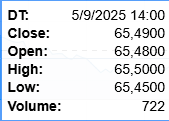

In [88]:
modelo.predict(prever)

array([32.9885252])